### **Problem statement:**
#### Classification of mushroom 

#### step:1 **Import important packages**

In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv datafile into a dataframe
mushroom_df = pd.read_csv('mushrooms.csv',na_values ='?')

In [3]:
# Preview the first five records
mushroom_df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
mushroom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  5644 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
# Check the number of rows and columns
print('The number of samples in the dataset is {}.'.format(mushroom_df.shape[0]))

The number of samples in the dataset is 8124.


#### step:2 **Data Quality and Missing Values Assessment**

In [6]:
# Lets take a look at the missing values
mushroom_df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [7]:
print('Percent of missing "stalk-root" records is %.2f%%' %((mushroom_df['stalk-root'].isnull().sum()/mushroom_df.shape[0])*100))

Percent of missing "stalk-root" records is 30.53%


In [8]:
# Checking unique values in every column
for name in mushroom_df.columns:
    print(name,'-->',mushroom_df[name].unique())

class --> ['p' 'e']
cap-shape --> ['x' 'b' 's' 'f' 'k' 'c']
cap-surface --> ['s' 'y' 'f' 'g']
cap-color --> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises --> ['t' 'f']
odor --> ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment --> ['f' 'a']
gill-spacing --> ['c' 'w']
gill-size --> ['n' 'b']
gill-color --> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape --> ['e' 't']
stalk-root --> ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring --> ['s' 'f' 'k' 'y']
stalk-surface-below-ring --> ['s' 'f' 'y' 'k']
stalk-color-above-ring --> ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring --> ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type --> ['p']
veil-color --> ['w' 'n' 'o' 'y']
ring-number --> ['o' 't' 'n']
ring-type --> ['p' 'e' 'l' 'f' 'n']
spore-print-color --> ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population --> ['s' 'n' 'a' 'v' 'y' 'c']
habitat --> ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [9]:
# from the above observation we can see that veil-type has one class
# So we should drop it
mushroom_df.drop('veil-type',axis = 1,inplace = True)

In [10]:
for name in mushroom_df.columns:
    print(f'\n',mushroom_df[name].value_counts())
    


 e    4208
p    3916
Name: class, dtype: int64

 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

 f    4748
t    3376
Name: bruises, dtype: int64

 n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

 f    7914
a     210
Name: gill-attachment, dtype: int64

 c    6812
w    1312
Name: gill-spacing, dtype: int64

 b    5612
n    2512
Name: gill-size, dtype: int64

 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

 t    4608
e    3516
Name: stalk-shape, dtype: int64

 b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

 s    5176
k    2372
f     552
y      24


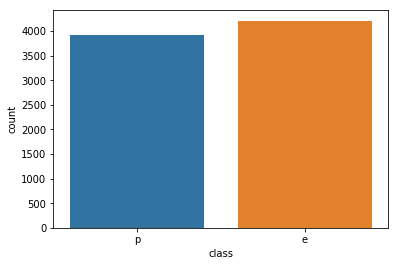

In [11]:
# checking if our dataset is unbalanced
x = mushroom_df['class']
ax = sns.countplot(x=x,data= mushroom_df)

In [12]:
### Lets look how each feature affect the target class
def plot_data(hue, data):
    for i,col in enumerate(mushroom_df.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.countplot(x = mushroom_df[col],hue = hue, data= mushroom_df)
        

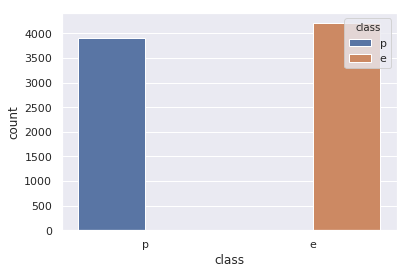

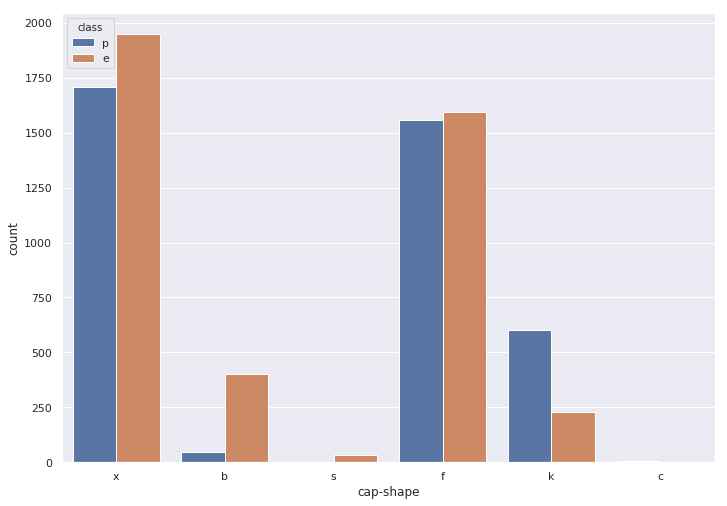

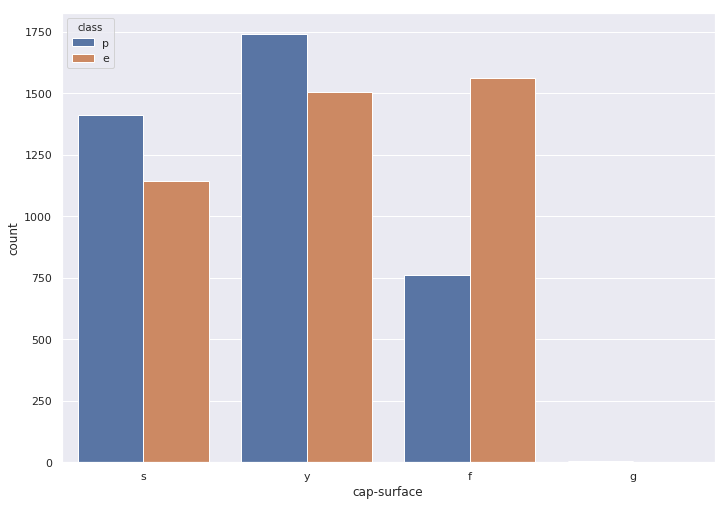

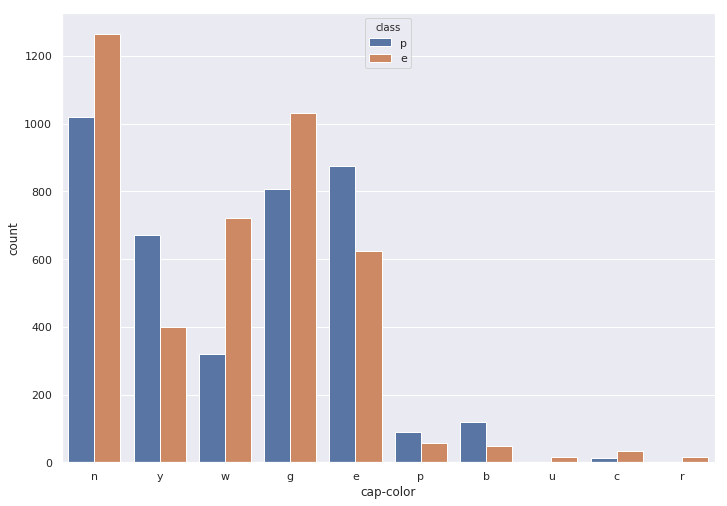

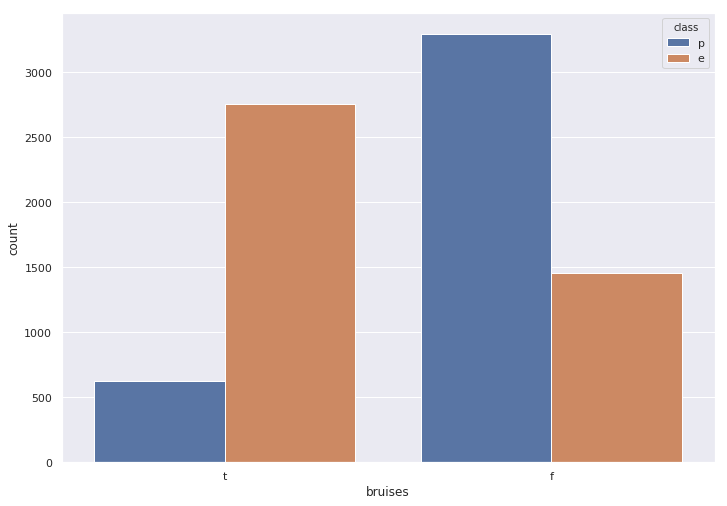

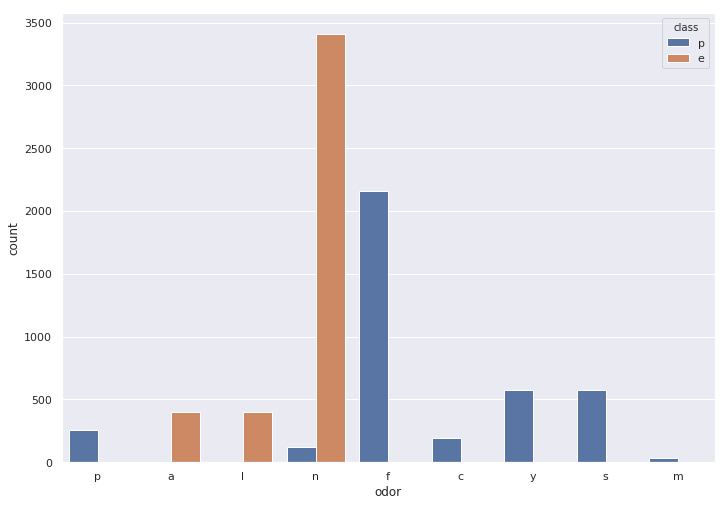

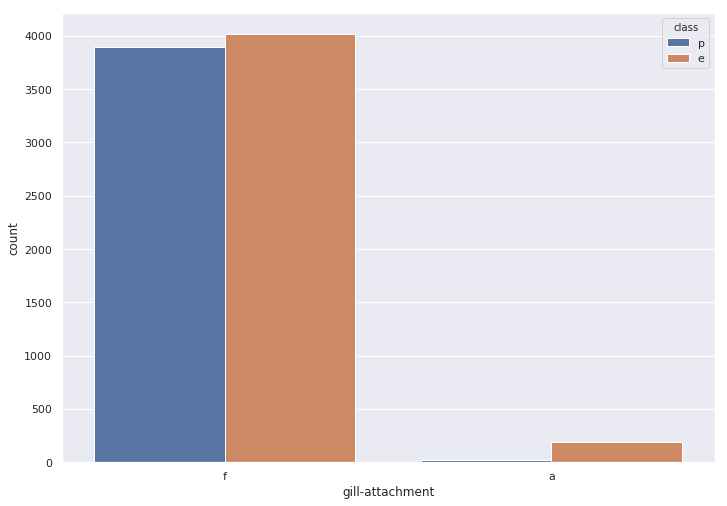

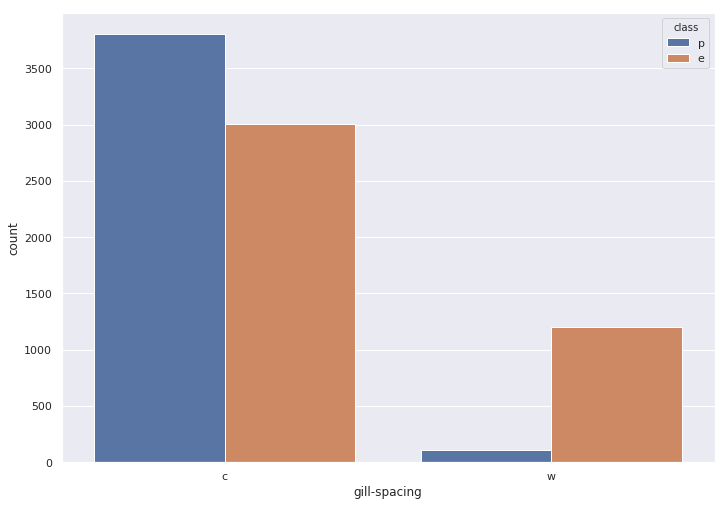

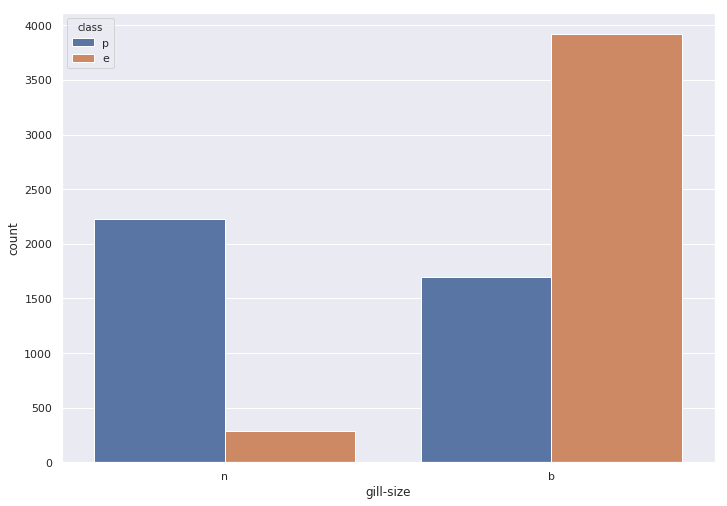

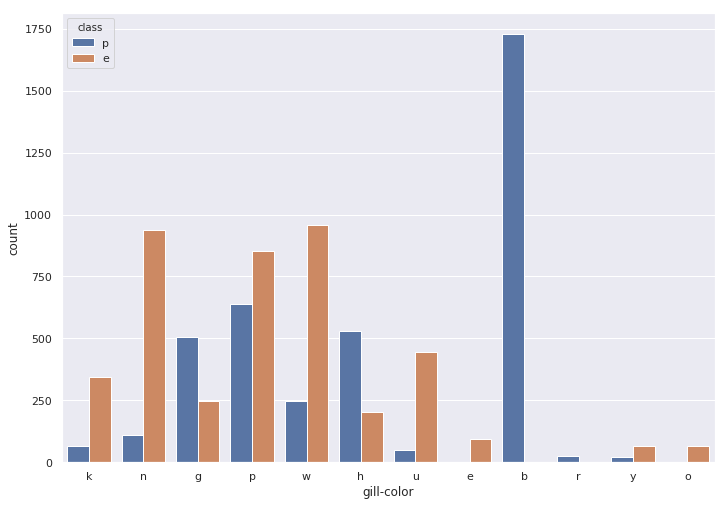

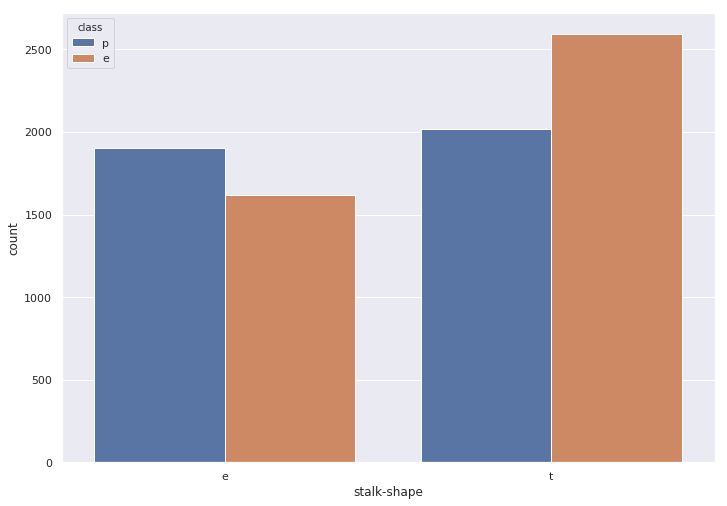

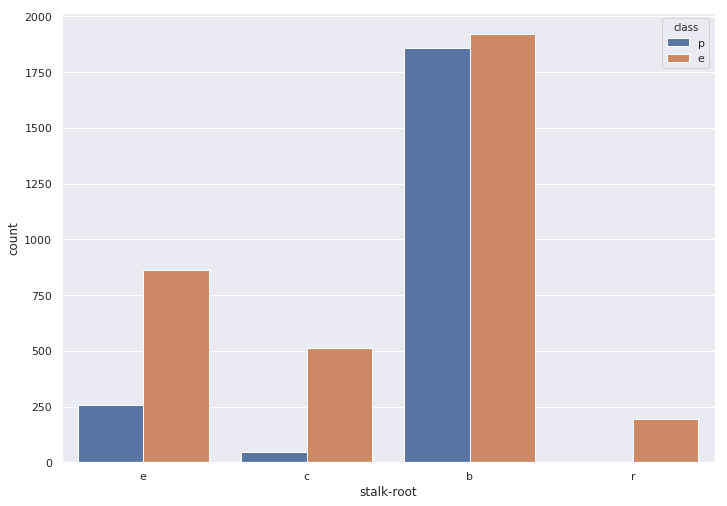

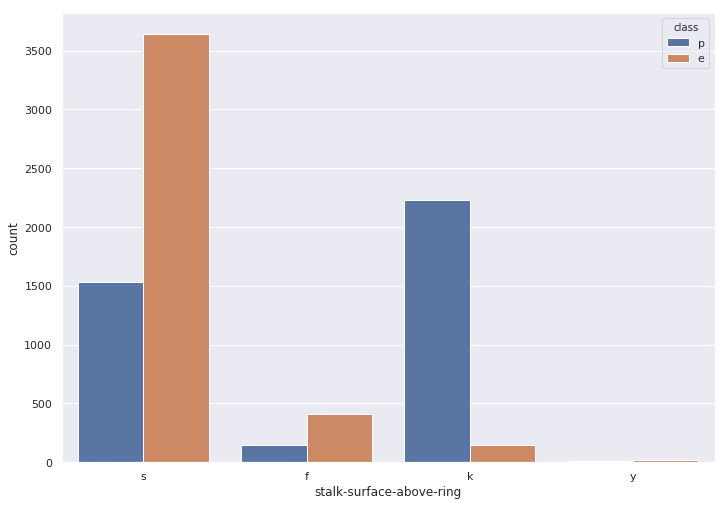

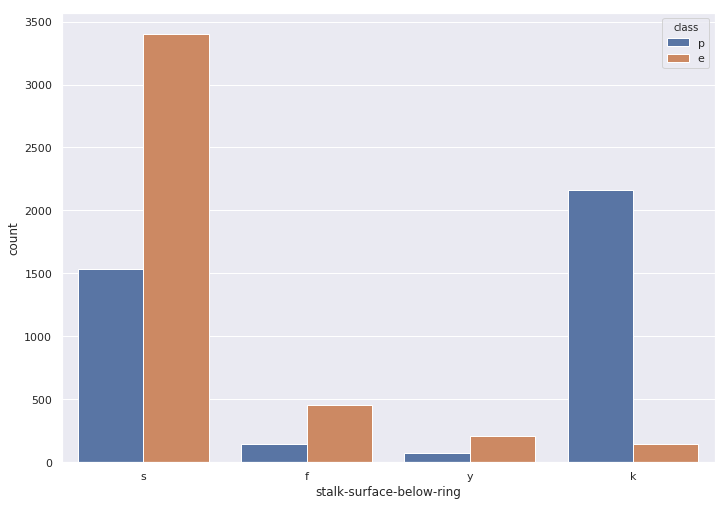

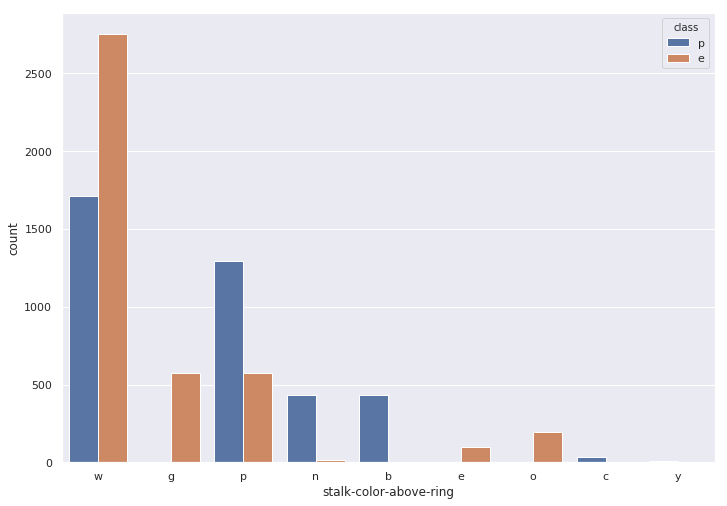

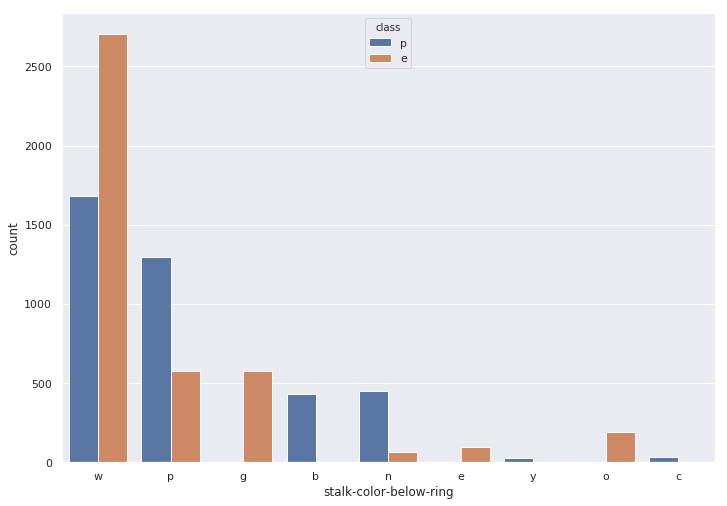

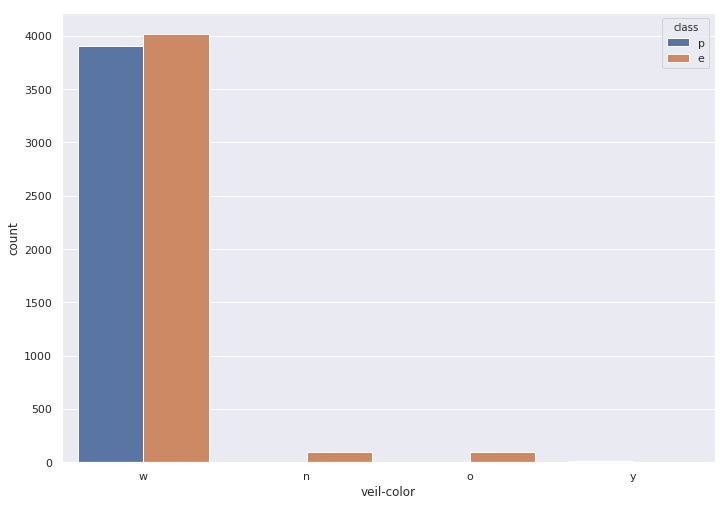

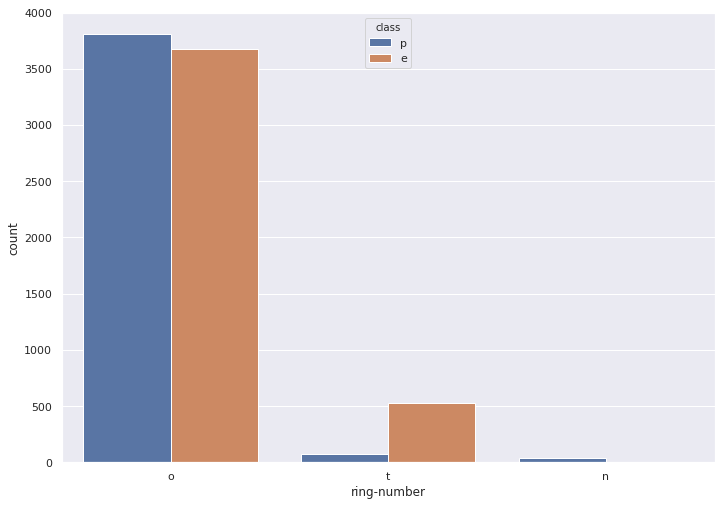

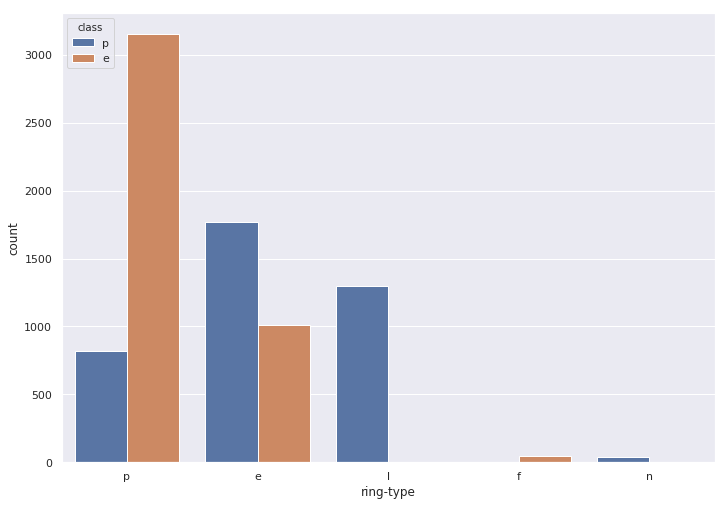

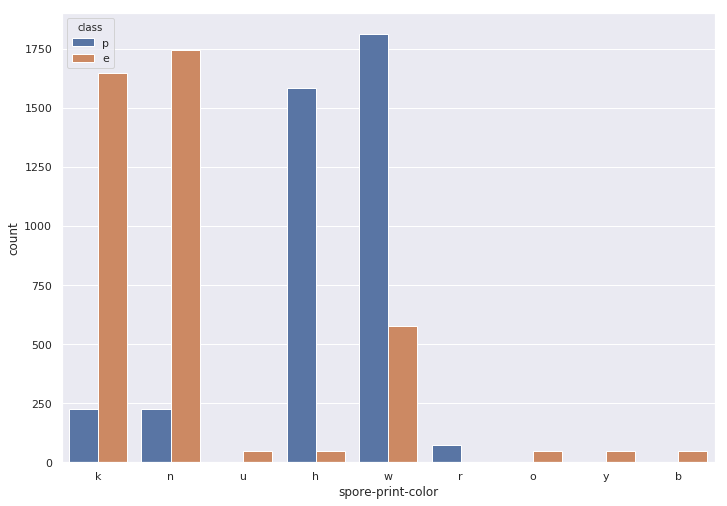

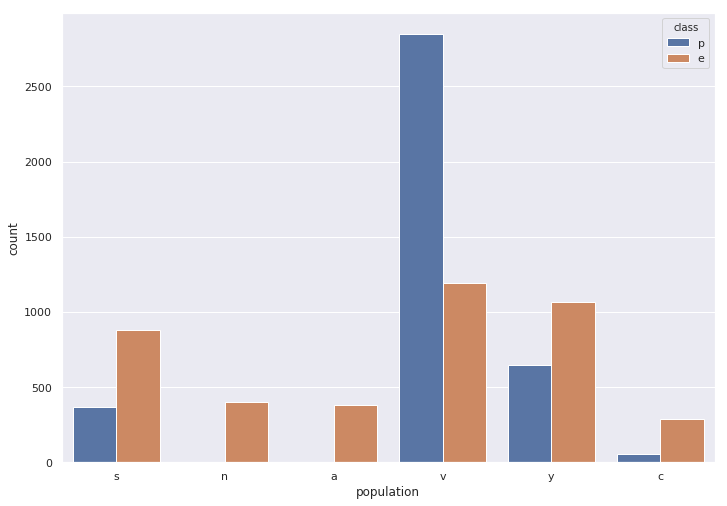

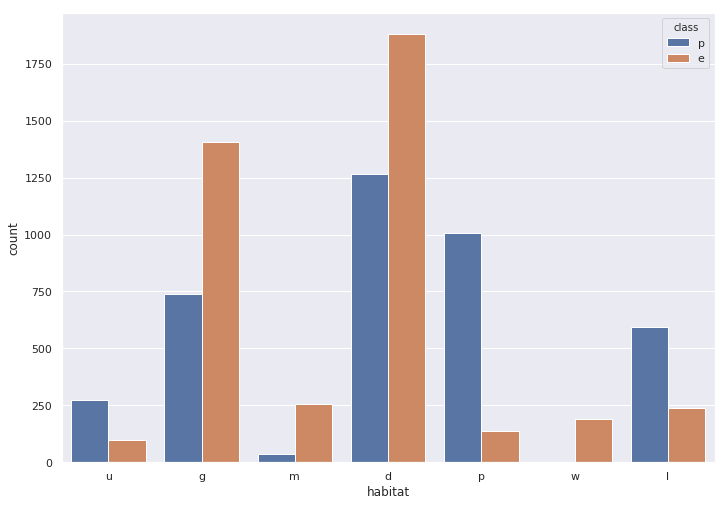

In [13]:
hue = mushroom_df['class']
data_plt = mushroom_df.drop('class',axis = 1)
plot_data(hue,data_plt)

### **Conclusion from the above countplots**

* from the above eda we can conclude that
* only poisonous mushrooms have convex cap-shape; only edible mushrooms have sunken cap-shape
* only poisonous mushrooms have cap-surface with grooves
* only edible mushrooms have green or purple cap-color
* odor is strongly indicative of what mushrooms are (edible/poisonous)
* only poisonous mushrooms have buff or green gill color
* only edible mushrooms have red or orange gill color
* only edible mushrooms have rooted stalk root
* stalk_color_above_ring and stalk_color_below_ring are relevant features for out classification problem
* only edible mushrooms have brown veil color
* only poisonous mushrooms have yellow veil color
* only poisonous mushrooms do not have rings
* only edible mushrooms have flaring ring type
* only poisonous mushrooms have none ring type
* only edible mushrooms have black, orange, purple or yellow spore print color
* only poisonous mushrooms have green spore print color
* only edible mushrooms have abundant or numerous population
* only edible musrooms have waste type habitat



### step:3 **Manipulating Data**

In [14]:
# We need to encode our data into numbers, we will use LabelEncoding and One-hot encoding
# Lets start with the target column
le = LabelEncoder()
le.fit(['e','p'])
mushroom_df.loc[:,'class'] = le.transform(mushroom_df['class'])


In [15]:
# sns.boxplot(x = mushroom_df['class'])

In [16]:
# columns with only two classes will be labelencoded
for name in mushroom_df.columns:
    if mushroom_df[name].nunique() == 2:
        print(name,':',mushroom_df[name].unique())
#     cols = mushroom_df.loc[mushroom_df[name].nunique() == 2,name].index

class : [1 0]
bruises : ['t' 'f']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
stalk-shape : ['e' 't']


In [17]:
enc_col_data = {'bruises':{'t':1,'f':0},
               'gill-attachment':{'f': 0,'a':1},
               'gill-spacing':{'c':0,'w':1},
               'gill-size':{'n':0,'b':1},
               'stalk-shape':{'e':0,'t':1}}



In [18]:
mushroom_df.replace(enc_col_data,inplace = True)

In [19]:
mushroom_df.head()

class cap-shape cap-surface cap-color  bruises odor  gill-attachment  \
0      1         x           s         n        1    p                0   
1      0         x           s         y        1    a                0   
2      0         b           s         w        1    l                0   
3      1         x           y         w        1    p                0   
4      0         x           s         g        0    n                0   

   gill-spacing  gill-size gill-color  ...  stalk-surface-above-ring  \
0             0          0          k  ...                         s   
1             0          1          k  ...                         s   
2             0          1          n  ...                         s   
3             0          0          n  ...                         s   
4             1          1          k  ...                         s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  veil-color ring-number ring-type spore-print-color population habitat  
0          w           o         p                 k          s       u  
1          w           o         p                 n          n       g  
2          w           o         p                 n          n       m  
3          w           o         p                 k          s       u  
4          w           o         e                 n          a       g  

[5 rows x 22 columns]

In [20]:
# Checking unique values in every column
for name in mushroom_df.columns:
    print(name,'-->',mushroom_df[name].unique())

class --> [1 0]
cap-shape --> ['x' 'b' 's' 'f' 'k' 'c']
cap-surface --> ['s' 'y' 'f' 'g']
cap-color --> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises --> [1 0]
odor --> ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment --> [0 1]
gill-spacing --> [0 1]
gill-size --> [0 1]
gill-color --> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape --> [0 1]
stalk-root --> ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring --> ['s' 'f' 'k' 'y']
stalk-surface-below-ring --> ['s' 'f' 'y' 'k']
stalk-color-above-ring --> ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring --> ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color --> ['w' 'n' 'o' 'y']
ring-number --> ['o' 't' 'n']
ring-type --> ['p' 'e' 'l' 'f' 'n']
spore-print-color --> ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population --> ['s' 'n' 'a' 'v' 'y' 'c']
habitat --> ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [21]:
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [22]:
ohe_columns = ['cap-shape', 'cap-surface', 'cap-color','odor','gill-color', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']
df_ohe = pd.get_dummies(mushroom_df,prefix_sep = '__',columns = ohe_columns)

In [23]:
df_ohe.describe()

class      bruises  gill-attachment  gill-spacing    gill-size  \
count  8124.000000  8124.000000      8124.000000   8124.000000  8124.000000   
mean      0.482029     0.415559         0.025849      0.161497     0.690793   
std       0.499708     0.492848         0.158695      0.368011     0.462195   
min       0.000000     0.000000         0.000000      0.000000     0.000000   
25%       0.000000     0.000000         0.000000      0.000000     0.000000   
50%       0.000000     0.000000         0.000000      0.000000     1.000000   
75%       1.000000     1.000000         0.000000      0.000000     1.000000   
max       1.000000     1.000000         1.000000      1.000000     1.000000   

       stalk-shape  cap-shape__b  cap-shape__c  cap-shape__f  cap-shape__k  \
count  8124.000000   8124.000000   8124.000000   8124.000000   8124.000000   
mean      0.567208      0.055638      0.000492      0.387986      0.101920   
std       0.495493      0.229235      0.022185      0.487321      0.302562   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%       0.000000      0.000000      0.000000      0.000000      0.000000   
50%       1.000000      0.000000      0.000000      0.000000      0.000000   
75%       1.000000      0.000000      0.000000      1.000000      0.000000   
max       1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  population__s  population__v  population__y   habitat__d  \
count  ...    8124.000000    8124.000000    8124.000000  8124.000000   
mean   ...       0.153619       0.497292       0.210734     0.387494   
std    ...       0.360605       0.500023       0.407855     0.487208   
min    ...       0.000000       0.000000       0.000000     0.000000   
25%    ...       0.000000       0.000000       0.000000     0.000000   
50%    ...       0.000000       0.000000       0.000000     0.000000   
75%    ...       0.000000       1.000000       0.000000     1.000000   
max    ...       1.000000       1.000000       1.000000     1.000000   

        habitat__g   habitat__l   habitat__m   habitat__p   habitat__u  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.264402     0.102413     0.035943     0.140817     0.045298   
std       0.441041     0.303209     0.186159     0.347854     0.207969   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        habitat__w  
count  8124.000000  
mean      0.023634  
std       0.151914  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 107 columns]

In [24]:
df_ohe['stalk-root'].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [25]:
# I use KNN to classify missing values in stalk-root
from sklearn.neighbors import KNeighborsClassifier

# Preparing my data
X = df_ohe.drop(['class','stalk-root'],axis = 1)
y = df_ohe['stalk-root'].fillna(-1)
with_vals = y.loc[y != -1].index
with_out_vals = y.loc[y == -1].index
# y.unique()
X_train = X.loc[with_vals, :]
X_test = X.loc[with_out_vals, :]
y_train = y.loc[with_vals]

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred
y_col = pd.Series(y_pred, index = with_out_vals)
# # y_train.append(y_col)
# y_col
df_ohe.loc[with_out_vals, 'stalk-root'] = y_pred


In [26]:
df_ohe.loc[:,'stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [27]:
df_ohe.head()

class  bruises  gill-attachment  gill-spacing  gill-size  stalk-shape  \
0      1        1                0             0          0            0   
1      0        1                0             0          1            0   
2      0        1                0             0          1            0   
3      1        1                0             0          0            0   
4      0        0                0             1          1            1   

  stalk-root  cap-shape__b  cap-shape__c  cap-shape__f  ...  population__s  \
0          e             0             0             0  ...              1   
1          c             0             0             0  ...              0   
2          c             1             0             0  ...              0   
3          e             0             0             0  ...              1   
4          e             0             0             0  ...              0   

   population__v  population__y  habitat__d  habitat__g  habitat__l  \
0              0              0           0           0           0   
1              0              0           0           1           0   
2              0              0           0           0           0   
3              0              0           0           0           0   
4              0              0           0           1           0   

   habitat__m  habitat__p  habitat__u  habitat__w  
0           0           0           1           0  
1           0           0           0           0  
2           1           0           0           0  
3           0           0           1           0  
4           0           0           0           0  

[5 rows x 108 columns]

In [28]:
# One hot encode stalk-root
dummy_col = pd.get_dummies(df_ohe['stalk-root'],prefix = 'stalk-root')
df_ohe = pd.concat([df_ohe,dummy_col],axis=1)
df_ohe.drop(['stalk-root'],axis = 1,inplace = True)

In [29]:
df_ohe.head()

class  bruises  gill-attachment  gill-spacing  gill-size  stalk-shape  \
0      1        1                0             0          0            0   
1      0        1                0             0          1            0   
2      0        1                0             0          1            0   
3      1        1                0             0          0            0   
4      0        0                0             1          1            1   

   cap-shape__b  cap-shape__c  cap-shape__f  cap-shape__k  ...  habitat__g  \
0             0             0             0             0  ...           0   
1             0             0             0             0  ...           1   
2             1             0             0             0  ...           0   
3             0             0             0             0  ...           0   
4             0             0             0             0  ...           1   

   habitat__l  habitat__m  habitat__p  habitat__u  habitat__w  stalk-root_b  \
0           0           0           0           1           0             0   
1           0           0           0           0           0             0   
2           0           1           0           0           0             0   
3           0           0           0           1           0             0   
4           0           0           0           0           0             0   

   stalk-root_c  stalk-root_e  stalk-root_r  
0             0             1             0  
1             1             0             0  
2             1             0             0  
3             0             1             0  
4             0             1             0  

[5 rows x 111 columns]

In [30]:
df_ohe.columns

Index(['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-shape', 'cap-shape__b', 'cap-shape__c', 'cap-shape__f',
       'cap-shape__k',
       ...
       'habitat__g', 'habitat__l', 'habitat__m', 'habitat__p', 'habitat__u',
       'habitat__w', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e',
       'stalk-root_r'],
      dtype='object', length=111)

In [31]:
X_data = df_ohe.drop('class',axis = 1)
y_data = df_ohe['class']

Optimal number of features: 8
Selected features: ['gill-size', 'odor__a', 'odor__f', 'odor__l', 'odor__n', 'stalk-surface-above-ring__k', 'stalk-color-below-ring__y', 'spore-print-color__r']


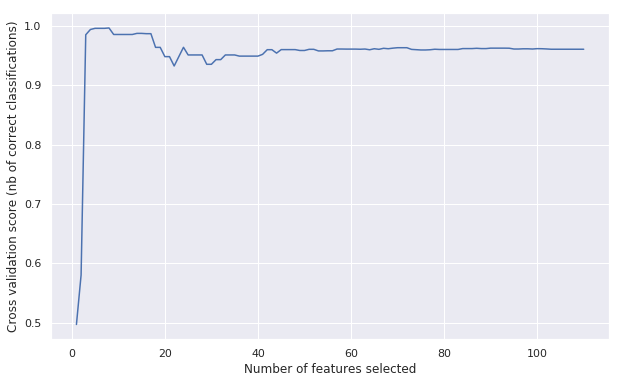

In [70]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(solver = 'lbfgs'), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_data, y_data)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_data.columns[rfecv.support_]))
featuress = X_data.columns[rfecv.support_]
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

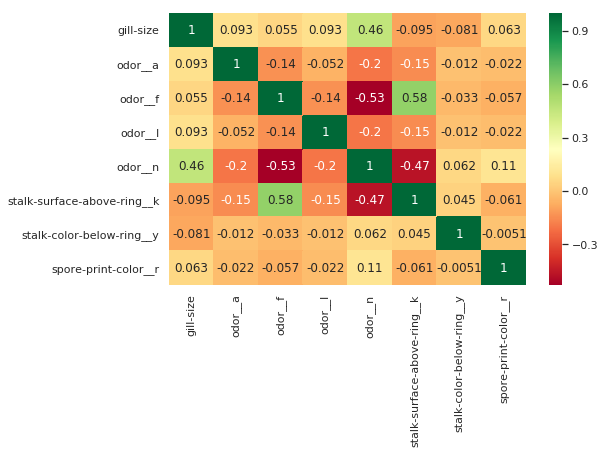

In [71]:
features = ['gill-size', 'odor__a', 'odor__f', 'odor__l', 'odor__n',
       'stalk-surface-above-ring__k', 'stalk-color-below-ring__y',
       'spore-print-color__r']
Xc = df_ohe[features]
plt.subplots(figsize=(8, 5))
sns.heatmap(Xc.corr(), annot=True, cmap="RdYlGn")
plt.show()

### **Classification of Mushroom using different machine learning models**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
# Checking out my columns
df_ohe.columns

Index(['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-shape', 'cap-shape__b', 'cap-shape__c', 'cap-shape__f',
       'cap-shape__k',
       ...
       'habitat__g', 'habitat__l', 'habitat__m', 'habitat__p', 'habitat__u',
       'habitat__w', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e',
       'stalk-root_r'],
      dtype='object', length=111)

In [36]:
x_features = df_ohe.drop('class', axis = 1).columns
# X = df_ohe[x_features]


In [38]:
X = df_ohe[list(x_features)]
y = df_ohe['class']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)


In [38]:
# x = df_ohe['bruises'].values
# y = df_ohe['gill-size'].values
# plt.scatter(x, y, s=area, c='red', alpha=0.5)
# plt.show()

### **RandomForestClassifier from sklearn**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc,accuracy_score,classification_report,precision_recall_curve

In [40]:
rnd_clf = RandomForestClassifier(n_estimators = 100)

In [41]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[842   0]
 [  0 783]]


Text(0.5, 50.92999999999999, 'Predicted label')

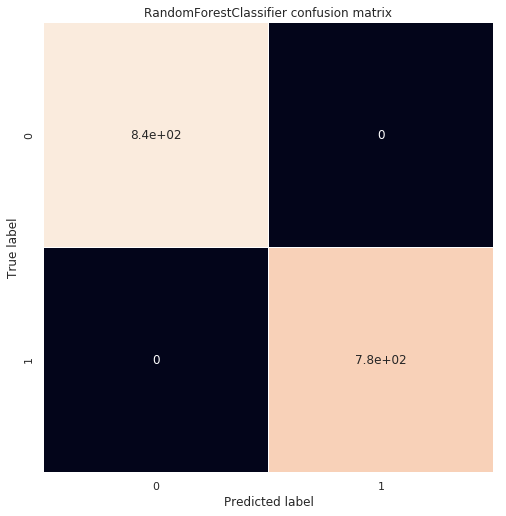

In [69]:
y_pred = rnd_clf.predict(X_test)
# Evaluate how our model workedb
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.heatmap(conf_mat, annot = True,  linewidths=.5, cbar =None,square = True)
plt.title('RandomForestClassifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [43]:
target_names = ['edible', 'poisonous']
print("Test data RandomForestClassifier report\n",classification_report(y_test, y_pred, target_names=target_names))

Test data RandomForestClassifier report
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



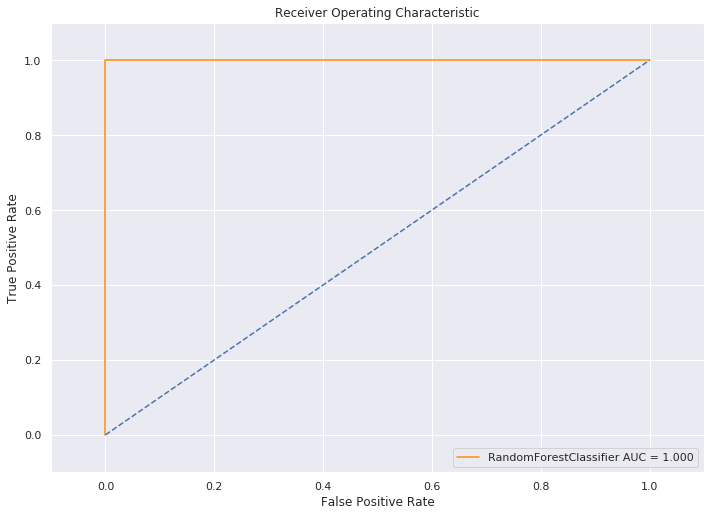

In [44]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
roc_curve_acc(y_test,y_pred,"RandomForestClassifier")

In [45]:
print('Training accuracy: {:.02f}'.format(accuracy_score(y_train,rnd_clf.predict(X_train))*100))
print('Testing accuracy: {:.02f}'.format(accuracy_score(y_test,rnd_clf.predict(X_test))*100))

Training accuracy: 100.00
Testing accuracy: 100.00


### **LogisticRegression from jmodels**

In [46]:
from jmodels import LogisticRegression

In [47]:
cl2 = LogisticRegression()

In [48]:
cl2.fit(X_train.values,y_train.values)

[[842   0]
 [  4 779]]


Text(0.5, 50.92999999999999, 'Predicted label')

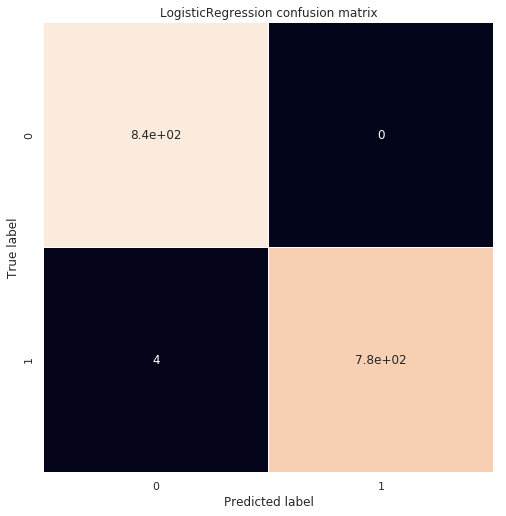

In [68]:
y_predd = cl2.predict(X_test)
conf_mat = confusion_matrix(y_test, y_predd)
print(conf_mat)
sns.heatmap(conf_mat, annot = True,  linewidths=.5, cbar =None,square = True)
plt.title('LogisticRegression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [50]:
target_names = ['edible', 'poisonous']
print("Test data LogisticRegression Report\n",classification_report(y_test, y_predd, target_names=target_names))

Test data LogisticRegression Report
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



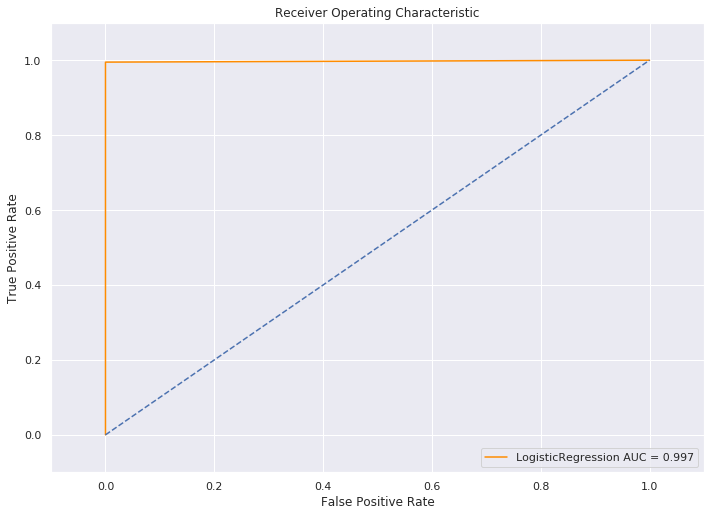

In [51]:
roc_curve_acc(y_test.values,y_predd,"LogisticRegression")

In [52]:
print("Training accuracy:{:.03f}".format(cl2.accuracy(X_train.values, y_train.values )))
print("Testing accuracy:{:.03f}".format(cl2.accuracy(X_test.values, y_test.values )))

Training accuracy:99.646
Testing accuracy:99.754


### **GaussianNB from jmodels**

In [53]:
from jmodels.gaussian import GaussianNB

In [54]:
cl3 = GaussianNB()

In [55]:
cl3.fit(X_train.values,y_train.values)

[[790  52]
 [114 669]]


Text(0.5, 50.92999999999999, 'Predicted label')

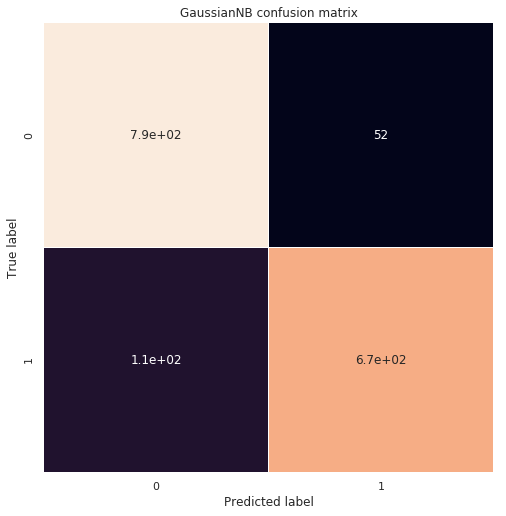

In [67]:
y_pred3 = cl3.predict(X_test)
conf_mat = confusion_matrix(y_test.values, y_pred3)
print(conf_mat)
sns.heatmap(conf_mat, annot = True,  linewidths= .5, cbar =None,square = True)
plt.title('GaussianNB confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [57]:
target_names = ['edible', 'poisonous']
print("Test data GaussianNB Report\n",classification_report(y_test.values, y_pred3, target_names=target_names))

Test data GaussianNB Report
               precision    recall  f1-score   support

      edible       0.87      0.94      0.90       842
   poisonous       0.93      0.85      0.89       783

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



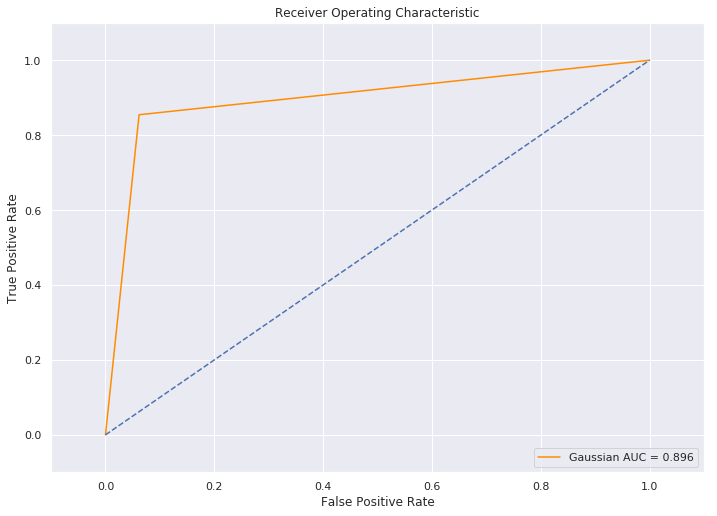

In [58]:
roc_curve_acc(y_test.values,y_pred3,"Gaussian")

In [59]:

print("Training accuracy:{:.03f}".format(cl3.accuracy(X_train, y_train )))
print("Testing accuracy:{:.03f}".format(cl3.accuracy(X_test, y_test )))

Training accuracy:90.629
Testing accuracy:89.785


### **LogisticRegression from sklearn**

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
ypred = lreg.predict(X_test)

lreg.score(X_test,y_test)
print("Training accuracy:{:.03f}".format(lreg.score(X_train,y_train)*100))
print("Testing accuracy:{:.03f}".format(lreg.score(X_test,y_test)*100))

Training accuracy:100.000
Testing accuracy:100.000


In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

print("Training accuracy:{:.03f}".format(gnb.score(X_train,y_train)*100))
print("Testing accuracy:{:.03f}".format(gnb.score(X_test,y_test)*100))

Training accuracy:94.630
Testing accuracy:94.892
